**Coverage Analysis Objectives**:<br>
a.
Calculate the median and coefficient of variation (CV) for single CpG coverage in each tissue <br>.
b.
Generate plots summarizing the coverage statistics .

**Note**: <br>All these tasks were performed using the Python and its associated libraries commonly used in Data Analysis/ Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [ ]:

# Construct the relative path
#data_path = os.path.join('.', '/phased_methylation_pattern/Pupil_Bio_PMP_analysis', 'PupilBioTest_PMP_revA.csv')
#df = pd.read_csv(data_path)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/phased_methylation_pattern/Pupil_Bio_PMP_analysis/PupilBioTest_PMP_revA.csv')


In [ ]:
df.shape # This CSV file is having 15392183 rows and 13 columns

(15392183, 13)

In [ ]:
df.head(5)

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA


In [ ]:
df.tail(5)

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
15392178,f,9998:10121:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392179,f,9998:10121:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet
15392180,f,9998:10130:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392181,f,9998:10130:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet
15392182,f,9998:10133:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet


In [ ]:
duplicates = df[df.duplicated(keep=False)]  # keep=False marks all duplicates as True

df_unique = df.drop_duplicates()


In [ ]:
df_unique.shape  # This dataset doesn't have any duplicated rows


(15392183, 13)

In [ ]:
df.info() # since this file is taking so much space, better to convert it to int32 to save space and speed up processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15392183 entries, 0 to 15392182
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   strand           object
 1   CpG_Coordinates  object
 2   `000             int64 
 3   `001             int64 
 4   `010             int64 
 5   `011             int64 
 6   `100             int64 
 7   `101             int64 
 8   `110             int64 
 9   `111             int64 
 10  Sample_ID        int64 
 11  Replicate        object
 12  Tissue           object
dtypes: int64(9), object(4)
memory usage: 1.5+ GB


In [ ]:
# Convert all numeric columns to int32
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].astype('int32')  # Convert to int32

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15392183 entries, 0 to 15392182
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   strand           object
 1   CpG_Coordinates  object
 2   `000             int32 
 3   `001             int32 
 4   `010             int32 
 5   `011             int32 
 6   `100             int32 
 7   `101             int32 
 8   `110             int32 
 9   `111             int32 
 10  Sample_ID        int32 
 11  Replicate        object
 12  Tissue           object
dtypes: int32(9), object(4)
memory usage: 998.2+ MB


In [ ]:
# splitting the CpG_Coordinates column so that its individual values have their own new column
df[['CpG_1', 'CpG_2', 'CpG_3']] = df['CpG_Coordinates'].str.split(':', expand=True).astype(int)

In [ ]:
df.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue,CpG_1,CpG_2,CpG_3
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10046
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10053
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10058
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10071
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10075


In [ ]:
# Now the CpG_Coordinates column can be dropped since it is not needed as these coordinates have their own new columns
df2= df.drop('CpG_Coordinates', axis=1)

In [ ]:
df2.head()

,strand,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue,CpG_1,CpG_2,CpG_3
0,r,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10046
1,r,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10053
2,r,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10058
3,r,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10071
4,r,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10075


**Median and CV calculation**

In [ ]:
methylation_columns= ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Calculate median and CV for cfDNA and Islet tissues
cfdna_median = df2[df2["Tissue"] == "cfDNA"][methylation_columns].median()
cfdna_cv = df2[df2["Tissue"] == "cfDNA"][methylation_columns].std() / df2[df2["Tissue"] == "cfDNA"][methylation_columns].mean()
islet_median = df2[df2["Tissue"] == "Islet"][methylation_columns].median()
islet_cv = df2[df2["Tissue"] == "Islet"][methylation_columns].std() / df2[df2["Tissue"] == "Islet"][methylation_columns].mean()


# Step 5: Prepare Data for Plotting
stats_df = pd.DataFrame({
    'CpG': methylation_columns,
    'cfDNA Median': cfdna_median.values,
    'cfDNA CV (%)': cfdna_cv.values,
    'Islet Median': islet_median.values,
    'Islet CV (%)': islet_cv.values
})

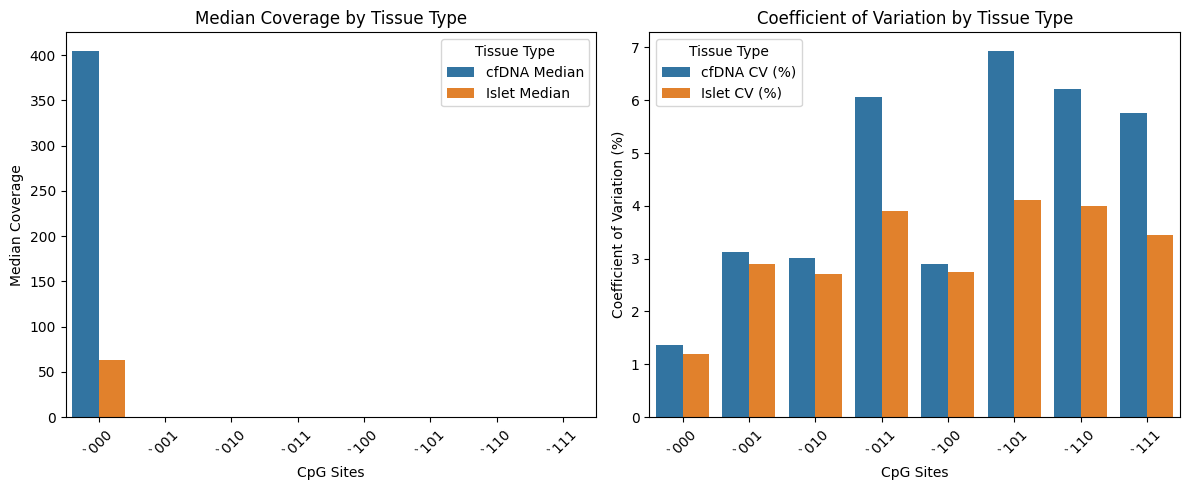

In [ ]:

# Step 6: Plotting Coverage Statistics
plt.figure(figsize=(12, 5))

# Plot Median Coverage
plt.subplot(1, 2, 1)
sns.barplot(data=stats_df.melt(id_vars='CpG', value_vars=['cfDNA Median', 'Islet Median']),
             x='CpG', y='value', hue='variable')
plt.title('Median Coverage by Tissue Type')
plt.xlabel('CpG Sites')
plt.ylabel('Median Coverage')
plt.xticks(rotation=45)
plt.legend(title='Tissue Type')

# Plot Coefficient of Variation
plt.subplot(1, 2, 2)
sns.barplot(data=stats_df.melt(id_vars='CpG', value_vars=['cfDNA CV (%)', 'Islet CV (%)']),
             x='CpG', y='value', hue='variable')
plt.title('Coefficient of Variation by Tissue Type')
plt.xlabel('CpG Sites')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45)
plt.legend(title='Tissue Type')

plt.tight_layout()
plt.savefig('coverage_statistics.png')
plt.show()


In [ ]:
# Step 1: Melt the DataFrame to long format for CpG coverage columns
coverage_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']
df_long = df2.melt(
    id_vars=['Tissue'],
    value_vars=coverage_columns,
    var_name='PMP',
    value_name='Coverage'
)


In [ ]:
# Step 2: Group by Tissue and compute median and CV
summary = df_long.groupby('Tissue')['Coverage'].agg(
    Median='median',
    Mean='mean',
    StdDev='std'
).reset_index()

In [ ]:

# Step 3: Calculate CV
summary['CV'] = summary['StdDev'] / summary['Mean']

# Display the result
print(summary)


  Tissue  Median        Mean      StdDev        CV
0  Islet     0.0   18.419936   64.460060  3.499472
1  cfDNA     0.0  126.688530  533.119026  4.208108


In [ ]:
# Boxplot for coverage distribution by tissue
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Coverage', data=df_long)
plt.title('Coverage Distribution by Tissue')
plt.ylabel('Coverage')
plt.xlabel('Tissue')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Step 3: Statistical Analysis to identify significant PMPs
p_values = {}
for col in methylation_columns:
    t_stat, p_val = stats.ttest_ind(cfdna_data[col], islet_data[col], equal_var=False)
    p_values[col] = p_val

# Convert p_values to a DataFrame for easier analysis
p_values_df = pd.DataFrame(list(p_values.items()), columns=['CpG', 'p_value'])

# Step 4: Multiple Testing Correction using Benjamini-Hochberg
p_values_df['adjusted_p_value'] = multipletests(p_values_df['p_value'], method='fdr_bh')[1]
alpha = 0.05  # Significance level
p_values_df['significant'] = p_values_df['adjusted_p_value'] < alpha

# Display all PMPs with their raw and adjusted p-values
print("PMPs with P-Values and Adjusted P-Values:\n", p_values_df)

# Display significant PMPs after adjustment
significant_pmps = p_values_df[p_values_df['significant']]
print("\nSignificant PMPs after adjustment:\n", significant_pmps)


PMPs with P-Values and Adjusted P-Values:
     CpG  p_value  adjusted_p_value  significant
0  `000      0.0               0.0         True
1  `001      0.0               0.0         True
2  `010      0.0               0.0         True
3  `011      0.0               0.0         True
4  `100      0.0               0.0         True
5  `101      0.0               0.0         True
6  `110      0.0               0.0         True
7  `111      0.0               0.0         True

Significant PMPs after adjustment:
     CpG  p_value  adjusted_p_value  significant
0  `000      0.0               0.0         True
1  `001      0.0               0.0         True
2  `010      0.0               0.0         True
3  `011      0.0               0.0         True
4  `100      0.0               0.0         True
5  `101      0.0               0.0         True
6  `110      0.0               0.0         True
7  `111      0.0               0.0         True


In [ ]:


# Define methylation columns with backticks
methylation_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Step 2: Calculate Variant Read Fraction (VRF)
# Assuming each column represents variant reads and total reads is the sum of all PMPs
df['Total_Reads'] = df[methylation_columns].sum(axis=1)

for col in methylation_columns:
    df[f'{col}_VRF'] = df[col] / df['Total_Reads']

# Step 3: Calculate Mean VRF for each PMP in both tissues
mean_vrf = df.groupby('Tissue')[[f'{col}_VRF' for col in methylation_columns]].mean().reset_index()

# Step 4: Display results
print("Mean Variant Read Fraction (VRF) for each PMP in both tissues:\n", mean_vrf)

# Optional: Save results to CSV for further analysis
mean_vrf.to_csv('mean_vrf_results.csv', index=False)


Mean Variant Read Fraction (VRF) for each PMP in both tissues:
   Tissue  `000_VRF  `001_VRF  `010_VRF  `011_VRF  `100_VRF  `101_VRF  \
0  Islet  0.844271  0.024049  0.020368  0.014968  0.021763  0.012482   
1  cfDNA  0.907418  0.015772  0.013900  0.007565  0.016336  0.004116   

   `110_VRF  `111_VRF  
0  0.014237  0.047862  
1  0.007432  0.027461  


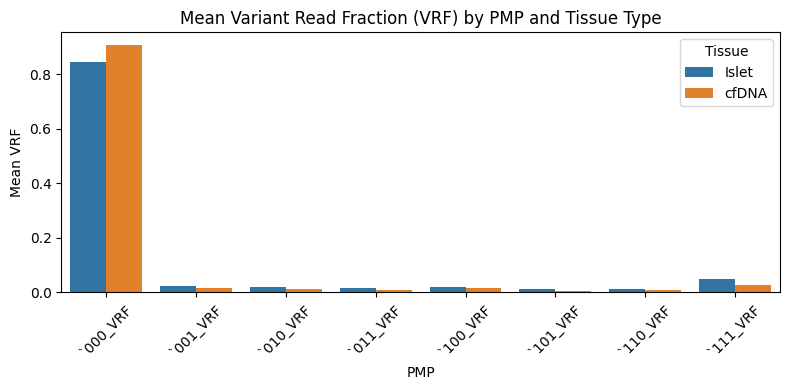

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the mean_vrf DataFrame for easier plotting
mean_vrf_melted = mean_vrf.melt(id_vars='Tissue', var_name='PMP', value_name='VRF')

# Set up the plot
plt.figure(figsize=(8, 4))
sns.barplot(data=mean_vrf_melted, x='PMP', y='VRF', hue='Tissue')
plt.title('Mean Variant Read Fraction (VRF) by PMP and Tissue Type')
plt.xlabel('PMP')
plt.ylabel('Mean VRF')
plt.xticks(rotation=45)
plt.legend(title='Tissue')
plt.tight_layout()
plt.show()


In [ ]:


# Define PMP columns based on your dataset
pmp_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Initialize an empty dictionary to store counts
counts = {col: {'cfDNA': 0, 'Islet': 0} for col in pmp_columns}

# Count occurrences of each tissue type for each column
for col in pmp_columns:
    counts[col]['cfDNA'] = df[df['Tissue'] == 'cfDNA'][col].count()
    counts[col]['Islet'] = df[df['Tissue'] == 'Islet'][col].count()

# Convert counts to a DataFrame for better visualization
counts_df = pd.DataFrame(counts).T
counts_df.columns = ['cfDNA Count', 'Islet Count']

# Display the counts DataFrame
#print(counts_df)



In [ ]:
counts_df

,cfDNA Count,Islet Count
`000,11602083,3790100
`001,11602083,3790100
`010,11602083,3790100
`011,11602083,3790100
`100,11602083,3790100
`101,11602083,3790100
`110,11602083,3790100
`111,11602083,3790100


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cfDNA Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cfDNA Count'}, axis=1)
              .sort_values('cfDNA Count', ascending=True))
  xs = counted['cfDNA Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = counts_df.sort_values('cfDNA Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cfDNA Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Islet Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Islet Count'}, axis=1)
              .sort_values('Islet Count', ascending=True))
  xs = counted['Islet Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = counts_df.sort_values('Islet Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Islet Count')
_ = plt.ylabel('count()')

In [ ]:

# Convert the methylation patterns ('000' to '111') to numerical values for analysis
methylation_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']
for column in methylation_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, replace errors with NaN


In [ ]:
df.head(5)

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue,Total_Reads,VRF
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA,1090,0.008257
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,1090,0.000000
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA,1090,0.015596
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA,1090,0.012844
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,1090,0.000000


In [ ]:

# 1a. Median and CV Calculation
coverage_cols = ["`000", "`001", "`010", "`011", "`100", "`101", "`110", "`111"]
df_grouped = df.groupby("Tissue")[coverage_cols]


# Median
median_coverage = df_grouped.median()
print("Median Coverage:\n", median_coverage)

Median Coverage:
          `000  `001  `010  `011  `100  `101  `110  `111
Tissue                                                 
Islet    63.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
cfDNA   405.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


In [ ]:
# List of the columns representing methylation patterns
methylation_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Group by 'Tissue' and sum the values for each methylation column
tissue_counts = df.groupby('Tissue')[methylation_columns].sum()

# Display the result
print(tissue_counts)


               `000       `001       `010       `011       `100      `101  \
Tissue                                                                      
Islet     447737756   16686603   13605247   11599919   13952275   8932146   
cfDNA   10455441302  201067901  178032989  106293322  205489751  62438118   

            `110       `111  
Tissue                       
Islet    9946549   36046709  
cfDNA   99067654  450975670  


In [ ]:
# Define methylation pattern columns
methylation_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Group by Tissue and count non-zero rows for each methylation column
methylation_row_counts = df.groupby('Tissue')[methylation_columns].apply(lambda x: (x > 0).sum())

# Display the result
print(methylation_row_counts)


            `000     `001     `010     `011     `100     `101     `110  \
Tissue                                                                   
Islet    3727881  1345339  1306003   751024  1333555   665071   726074   
cfDNA   11532037  4602875  4434423  1741094  4693007  1216178  1740617   

           `111  
Tissue           
Islet    865097  
cfDNA   3330110  


In [ ]:
print(df.groupby("Tissue")[coverage_cols].describe())


              `000                                                     \
             count        mean          std  min   25%    50%     75%   
Tissue                                                                  
Islet    3790100.0  118.133494   141.621767  0.0  15.0   63.0   174.0   
cfDNA   11602083.0  901.169325  1233.919835  0.0  74.0  405.0  1240.0   

                       `001             ... `110                `111  \
            max       count       mean  ...  75%     max       count   
Tissue                                  ...                            
Islet    1313.0   3790100.0   4.402681  ...  0.0   546.0   3790100.0   
cfDNA   14412.0  11602083.0  17.330328  ...  0.0  5316.0  11602083.0   

                                                           
             mean         std  min  25%  50%  75%     max  
Tissue                                                     
Islet    9.510754   32.844280  0.0  0.0  0.0  0.0   890.0  
cfDNA   38.870233  223.479932  0.

In [ ]:
print(df[df["Tissue"] == "cfDNA"][coverage_cols].median())
print(df[df["Tissue"] == "Islet"][coverage_cols].median())


`000    405.0
`001      0.0
`010      0.0
`011      0.0
`100      0.0
`101      0.0
`110      0.0
`111      0.0
dtype: float64
`000    63.0
`001     0.0
`010     0.0
`011     0.0
`100     0.0
`101     0.0
`110     0.0
`111     0.0
dtype: float64


In [ ]:
# Coefficient of Variation (CV)
cv_coverage = df_grouped.std() / df_grouped.mean()
print("\nCoefficient of Variation (CV):\n", cv_coverage)


Coefficient of Variation (CV):
             `000      `001      `010      `011      `100      `101      `110  \
Tissue                                                                         
Islet   1.198828  2.897120  2.710618  3.906811  2.743412  4.101577  4.001940   
cfDNA   1.369243  3.124041  3.003106  6.062089  2.895480  6.938707  6.207752   

            `111  
Tissue            
Islet   3.453383  
cfDNA   5.749385  


In [ ]:
# 2b. Calculate Mean Variant Read Fraction (VRF)
df["Total_Reads"] = df[coverage_cols].sum(axis=1)
df["VRF"] = df["`001"] / df["Total_Reads"]
vrf_mean = df.groupby("Tissue")["VRF"].mean()
print("\nMean VRF by Tissue:\n", vrf_mean)


Mean VRF by Tissue:
 Tissue
Islet    0.024049
cfDNA    0.015772
Name: VRF, dtype: float64


In [ ]:
df.info()

In [ ]:
# Split 'CpG_Coordinates' into separate columns (x, y, z positions)
df[['CpG_1', 'CpG_2', 'CpG_3']] = df['CpG_Coordinates'].str.split(':', expand=True)
df[['CpG_1', 'CpG_2', 'CpG_3']] = df[['CpG_1', 'CpG_2', 'CpG_3']].apply(pd.to_numeric, errors='coerce')

# Check if data is cleaned
df.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue,CpG_1,CpG_2,CpG_3
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10046
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10053
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10058
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10071
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,10035,10044,10075


In [ ]:
df.value_counts('Tissue')

,count
Tissue,
cfDNA,11602083
Islet,3790100


In [ ]:
df.value_counts('Replicate')

,count
Replicate,
Rep1,9523653
Rep2,5868530


In [ ]:
total_counts = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1)


In [ ]:
df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']] = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].div(total_counts, axis=0)


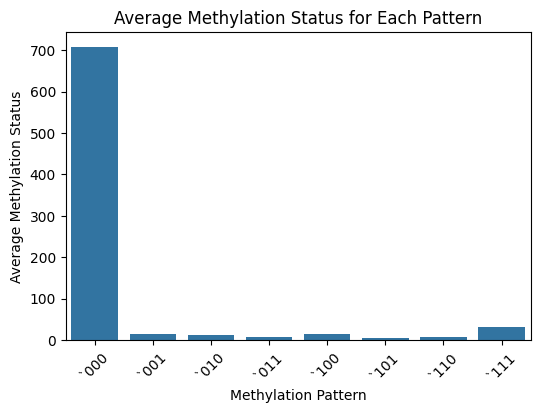

In [ ]:
# Visualize methylation status distributions across CpG sites
methylation_data = df[methylation_columns].mean(axis=0)  # Mean methylation status across CpG sites

# Plot methylation distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=methylation_columns, y=methylation_data)
plt.title("Average Methylation Status for Each Pattern")
plt.ylabel("Average Methylation Status")
plt.xlabel("Methylation Pattern")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare features and target variable
X = df[methylation_columns]
y = df['Tissue_encoded']  # Target variable (encoded tissue type)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Methylation Patterns")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(methylation_columns)[indices], rotation=90)
plt.xlabel("Methylation Pattern")
plt.ylabel("Importance")
plt.show()


**Machine learning**

In [ ]:
df.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA


In [ ]:
df['strand'] = df['strand'].map({'f': 1, 'r': 0})

In [ ]:
df['Tissue'] = df['Tissue'].map({'cfDNA': 1, 'Islet': 0})

In [ ]:
df['Replicate'] = df['Replicate'].map({'Rep1': 1, 'Rep2': 0})

In [ ]:
df.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,0,10035:10044:10046,1077,9,0,0,0,0,0,4,1,0,1
1,0,10035:10044:10053,1086,0,0,0,0,0,0,4,1,0,1
2,0,10035:10044:10058,1069,17,0,0,0,0,0,4,1,0,1
3,0,10035:10044:10071,1072,14,0,0,0,0,0,4,1,0,1
4,0,10035:10044:10075,1086,0,0,0,0,0,0,4,1,0,1


In [ ]:
df.tail()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
15392178,1,9998:10121:10133,76,0,0,0,0,0,0,0,80,Rep1,0
15392179,1,9998:10121:10140,47,0,0,0,0,0,0,0,80,Rep1,0
15392180,1,9998:10130:10133,76,0,0,0,0,0,0,0,80,Rep1,0
15392181,1,9998:10130:10140,47,0,0,0,0,0,0,0,80,Rep1,0
15392182,1,9998:10133:10140,47,0,0,0,0,0,0,0,80,Rep1,0


In [ ]:
df.value_counts('Replicate')

,count
Replicate,
1,9523653
0,5868530


In [ ]:
df['Replicate'] = df['Replicate'].astype('int32')  # Example for integer columns


In [ ]:
# Convert all numeric columns to int32
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].astype('int32')  # Convert to int32

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15392183 entries, 0 to 15392182
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   strand           int32 
 1   CpG_Coordinates  object
 2   `000             int32 
 3   `001             int32 
 4   `010             int32 
 5   `011             int32 
 6   `100             int32 
 7   `101             int32 
 8   `110             int32 
 9   `111             int32 
 10  Sample_ID        int32 
 11  Replicate        int32 
 12  Tissue           int32 
dtypes: int32(12), object(1)
memory usage: 822.0+ MB


In [ ]:
# Define PMP columns to normalize
pmp_columns = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

# Min-Max Normalization
df_min_max_normalized = df.copy()
df_min_max_normalized[pmp_columns] = (df[pmp_columns] - df[pmp_columns].min()) / (df[pmp_columns].max() - df[pmp_columns].min())

In [ ]:
df_min_max_normalized.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,0,10035:10044:10046,0.074729,0.003158,0.0,0.0,0.0,0.0,0.0,0.000455,1,0,1
1,0,10035:10044:10053,0.075354,0.000000,0.0,0.0,0.0,0.0,0.0,0.000455,1,0,1
2,0,10035:10044:10058,0.074174,0.005965,0.0,0.0,0.0,0.0,0.0,0.000455,1,0,1
3,0,10035:10044:10071,0.074382,0.004912,0.0,0.0,0.0,0.0,0.0,0.000455,1,0,1
4,0,10035:10044:10075,0.075354,0.000000,0.0,0.0,0.0,0.0,0.0,0.000455,1,0,1


In [ ]:
df_min_max_normalized.tail()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
15392178,1,9998:10121:10133,0.005273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,1,0
15392179,1,9998:10121:10140,0.003261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,1,0
15392180,1,9998:10130:10133,0.005273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,1,0
15392181,1,9998:10130:10140,0.003261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,1,0
15392182,1,9998:10133:10140,0.003261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80,1,0


In [ ]:
df3= df_min_max_normalized.drop(['CpG_Coordinates', 'Sample_ID'], axis=1)

In [ ]:
df3.head()

,strand,`000,`001,`010,`011,`100,`101,`110,`111,Replicate,Tissue
0,0,0.074729,0.003158,0.0,0.0,0.0,0.0,0.0,0.000455,0,1
1,0,0.075354,0.000000,0.0,0.0,0.0,0.0,0.0,0.000455,0,1
2,0,0.074174,0.005965,0.0,0.0,0.0,0.0,0.0,0.000455,0,1
3,0,0.074382,0.004912,0.0,0.0,0.0,0.0,0.0,0.000455,0,1
4,0,0.075354,0.000000,0.0,0.0,0.0,0.0,0.0,0.000455,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Prepare features and target variable
X = df[['strand', '`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']] # Features
y = df['Tissue'] # Target variable

In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
